In [1]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load Train and Test datasets
data_train = pd.read_csv('Resources/data_train.csv', index_col=0)
data_test = pd.read_csv('Resources/data_test.csv', index_col=0)

In [3]:
# Set target and data for train and test
train_target = data_train.system_result
train_data = data_train.drop('system_result', axis=1)
test_target = data_test.system_result
test_data = data_test.drop('system_result', axis=1)
train_data.head()

,step02h_eqparamA,step02t_eqparamA,step03h_eqparamA,step03t_eqparamA,step04h_eqparamA,step04t_eqparamA,step05h_eqparamA,step05t_eqparamA,step08h_eqparamA,step10h_eqparamA,...,step05t_eqparamB,step01h_reagparamA,step01at_reagparamA,step01bt_reagparamA,step03h_reagparamB,step03t_reagparamB,system_eqparamC,system_reageparamC,system_eqparamD,system_state
204,10.206160,5.269793,18.245564,14.571557,13.458512,2.689148,9.163512,1.951001,9.841448,10.359803,...,0.793088,26.269190,0.000000,0.000000,324.179591,350.000000,6.0,8.722018,4.397878,72.356881
288,11.594693,12.964035,22.000000,18.818674,18.696033,5.849144,16.851863,5.854144,14.000000,10.000000,...,0.659266,27.960881,5.000000,5.000000,350.000000,199.284751,9.0,7.011022,6.656041,129.070620
10,13.908432,9.577346,21.442433,17.182340,17.068098,3.270258,18.392727,4.670424,10.782260,11.961294,...,0.613816,18.719290,7.303457,5.237318,367.302272,364.291947,7.0,7.004696,5.696511,161.511362
343,12.587146,9.169558,23.169612,18.431346,15.830304,2.000000,15.636228,3.212020,12.000000,10.873549,...,0.759087,32.231470,4.900000,4.900000,325.692583,325.698341,6.0,6.897593,5.902288,120.920581
12,15.121956,11.482360,20.894701,18.202655,15.983783,2.901994,14.030560,2.848830,7.282235,8.266934,...,0.570682,22.622427,10.124394,6.764165,350.000000,300.000000,7.0,7.278901,5.216746,103.095827


In [4]:
# Run the model using all features
rf = RandomForestClassifier(n_estimators=500, random_state=3)
rf = rf.fit(train_data, train_target)
rf.score(test_data, test_target)

0.7741935483870968

In [5]:
# Examine feature importance to determine which features to remove
feature_names = train_data.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09138930751395671, 'step01bt_eqparamB'),
 (0.04883084336201897, 'step04t_eqparamB'),
 (0.04874465401895736, 'step05t_eqparamB'),
 (0.045077365247388666, 'step02t_eqparamA'),
 (0.04482626863010217, 'system_state'),
 (0.04229813603510717, 'step10h_eqparamA'),
 (0.04220963755689024, 'step02h_eqparamA'),
 (0.04060284630950979, 'step12h_eqparamA'),
 (0.04049299086312734, 'system_eqparamD'),
 (0.04033578044133264, 'step03t_eqparamA'),
 (0.03959257617056286, 'step02t_eqparamB'),
 (0.036773087612479306, 'system_reageparamC'),
 (0.03600458764671445, 'step01at_reagparamA'),
 (0.03528741268523562, 'step05t_eqparamA'),
 (0.03505612548784572, 'step05h_eqparamA'),
 (0.03479765628741092, 'step01at_eqparamB'),
 (0.034194106556704164, 'step08h_eqparamA'),
 (0.033876177030686475, 'step04h_eqparamA'),
 (0.033797130275527, 'step01h_reagparamA'),
 (0.031888138355461546, 'step03h_eqparamA'),
 (0.02940301861155584, 'step04t_eqparamA'),
 (0.02923514195249355, 'system_eqparamA'),
 (0.028177843689522683, 's

In [6]:
# Compared to the basic Descision Tree model, the features are much more evenly distributed in importance
# 26 possible features, will loop through to determine which number of features yields the best score
# Use sklearn SelectFromModel to retain best features
from sklearn.feature_selection import SelectFromModel
num_features = []
scores = []
for i in range(1,27):
    rf = RandomForestClassifier(n_estimators=500, random_state=3)
    fs = SelectFromModel(rf, max_features=i)
    fs.fit(train_data, train_target)
    train_data_fs = fs.transform(train_data)
    test_data_fs = fs.transform(test_data)
    rf.fit(train_data_fs, train_target)
    num_features.append(i)
    scores.append(rf.score(test_data_fs, test_target))

In [7]:
# From the data gathered, using 9 features yields the best result (tied with 10) and is still a managable number
sorted(zip(scores, num_features), reverse=True)

[(0.7903225806451613, 10),
 (0.7903225806451613, 9),
 (0.7580645161290323, 26),
 (0.7580645161290323, 25),
 (0.7580645161290323, 24),
 (0.7580645161290323, 23),
 (0.7580645161290323, 22),
 (0.7580645161290323, 21),
 (0.7580645161290323, 20),
 (0.7580645161290323, 19),
 (0.7580645161290323, 18),
 (0.7580645161290323, 17),
 (0.7580645161290323, 16),
 (0.7580645161290323, 15),
 (0.7580645161290323, 14),
 (0.7580645161290323, 13),
 (0.7580645161290323, 12),
 (0.7580645161290323, 11),
 (0.7419354838709677, 8),
 (0.7258064516129032, 7),
 (0.7258064516129032, 6),
 (0.6935483870967742, 5),
 (0.6129032258064516, 4),
 (0.6129032258064516, 2),
 (0.5967741935483871, 3),
 (0.5, 1)]

In [8]:
# Run model with 9 features
rf = RandomForestClassifier(n_estimators=500, random_state=3)
fs = SelectFromModel(rf, max_features=9)
fs.fit(train_data, train_target)
train_data_fs = fs.transform(train_data)
test_data_fs = fs.transform(test_data)
rf.fit(train_data_fs, train_target)
score = rf.score(test_data_fs, test_target)
print("score:",score)
print(sorted(zip(rf.feature_importances_, train_data.loc[:,fs.get_support()].columns), reverse=True))

score: 0.7903225806451613
[(0.1665282238992734, 'step01bt_eqparamB'), (0.11646942164693973, 'system_state'), (0.11494192584697444, 'step05t_eqparamB'), (0.10474914339352913, 'step02t_eqparamA'), (0.10284232948567736, 'system_eqparamD'), (0.10282376379167599, 'step04t_eqparamB'), (0.09841413280293841, 'step02h_eqparamA'), (0.097132035178906, 'step10h_eqparamA'), (0.09609902395408551, 'step12h_eqparamA')]


In [9]:
# Features remaining after feature selection
train_data.loc[:,fs.get_support()].columns

Index(['step02h_eqparamA', 'step02t_eqparamA', 'step10h_eqparamA',
       'step12h_eqparamA', 'step01bt_eqparamB', 'step04t_eqparamB',
       'step05t_eqparamB', 'system_eqparamD', 'system_state'],
      dtype='object')

In [10]:
# Testing a few different n_estimators to select the best score with a static num_features
num_estimators = []
scores_estimators = []
for i in [100, 250, 500, 750, 1000, 1500]:
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    fs = SelectFromModel(rf, max_features=6)
    fs.fit(train_data, train_target)
    train_data_fs = fs.transform(train_data)
    test_data_fs = fs.transform(test_data)
    rf.fit(train_data_fs, train_target)
    num_estimators.append(i)
    scores_estimators.append(rf.score(test_data_fs, test_target))

In [11]:
# 250 estimators yields the same (and best) scores while being the lowest value
sorted(zip(scores_estimators, num_estimators), reverse=True)

[(0.7419354838709677, 1500),
 (0.7419354838709677, 1000),
 (0.7419354838709677, 750),
 (0.7419354838709677, 250),
 (0.7258064516129032, 500),
 (0.6935483870967742, 100)]

In [12]:
# Run model with 9 features and 250 n_estimators
rf = RandomForestClassifier(n_estimators=250, random_state=3)
fs = SelectFromModel(rf, max_features=9)
fs.fit(train_data, train_target)
train_data_fs = fs.transform(train_data)
test_data_fs = fs.transform(test_data)
rf.fit(train_data_fs, train_target)
score = rf.score(test_data_fs, test_target)
print("score:",score)
print(sorted(zip(rf.feature_importances_, train_data.loc[:,fs.get_support()].columns), reverse=True))

score: 0.7419354838709677
[(0.16882284894553232, 'step01bt_eqparamB'), (0.1136524291150202, 'step05t_eqparamB'), (0.11335545563869416, 'system_state'), (0.11087564225310444, 'step04t_eqparamB'), (0.1086423779123633, 'step02t_eqparamA'), (0.10380803857448306, 'step02h_eqparamA'), (0.0984061038809053, 'step10h_eqparamA'), (0.09580751899414545, 'step12h_eqparamA'), (0.08662958468575181, 'step03t_eqparamA')]


In [13]:
# Features remaining after feature selection
train_data.loc[:,fs.get_support()].columns

Index(['step02h_eqparamA', 'step02t_eqparamA', 'step03t_eqparamA',
       'step10h_eqparamA', 'step12h_eqparamA', 'step01bt_eqparamB',
       'step04t_eqparamB', 'step05t_eqparamB', 'system_state'],
      dtype='object')

In [14]:
# classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
target_pred = rf.predict(test_data_fs)
print(confusion_matrix(test_target, target_pred))
print(classification_report(test_target, target_pred))

[[17  7  2]
 [ 2 29  2]
 [ 0  3  0]]
              precision    recall  f1-score   support

         Bad       0.89      0.65      0.76        26
        Good       0.74      0.88      0.81        33
     Warning       0.00      0.00      0.00         3

    accuracy                           0.74        62
   macro avg       0.55      0.51      0.52        62
weighted avg       0.77      0.74      0.75        62



In [15]:
# save fitted model to file
import joblib
filename = 'random_forest.sav'
joblib.dump(rf, filename)

['random_forest.sav']

[Text(0.49759615384615385, 0.95, 'step10h_eqparamA <= 8.852\ngini = 0.549\nsamples = 114\nvalue = [65, 104, 15]\nclass = Good'),
 Text(0.25721153846153844, 0.85, 'step01bt_eqparamB <= 1.146\ngini = 0.595\nsamples = 52\nvalue = [40, 32, 10]\nclass = Bad'),
 Text(0.13942307692307693, 0.75, 'step10h_eqparamA <= 6.298\ngini = 0.498\nsamples = 28\nvalue = [30, 9, 6]\nclass = Bad'),
 Text(0.057692307692307696, 0.65, 'step03t_eqparamA <= 20.253\ngini = 0.625\nsamples = 5\nvalue = [2, 4, 2]\nclass = Good'),
 Text(0.038461538461538464, 0.55, 'step12h_eqparamA <= 4.974\ngini = 0.444\nsamples = 4\nvalue = [0, 4, 2]\nclass = Good'),
 Text(0.019230769230769232, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Warning'),
 Text(0.057692307692307696, 0.45, 'step04t_eqparamB <= 0.545\ngini = 0.32\nsamples = 3\nvalue = [0, 4, 1]\nclass = Good'),
 Text(0.038461538461538464, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Warning'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsample

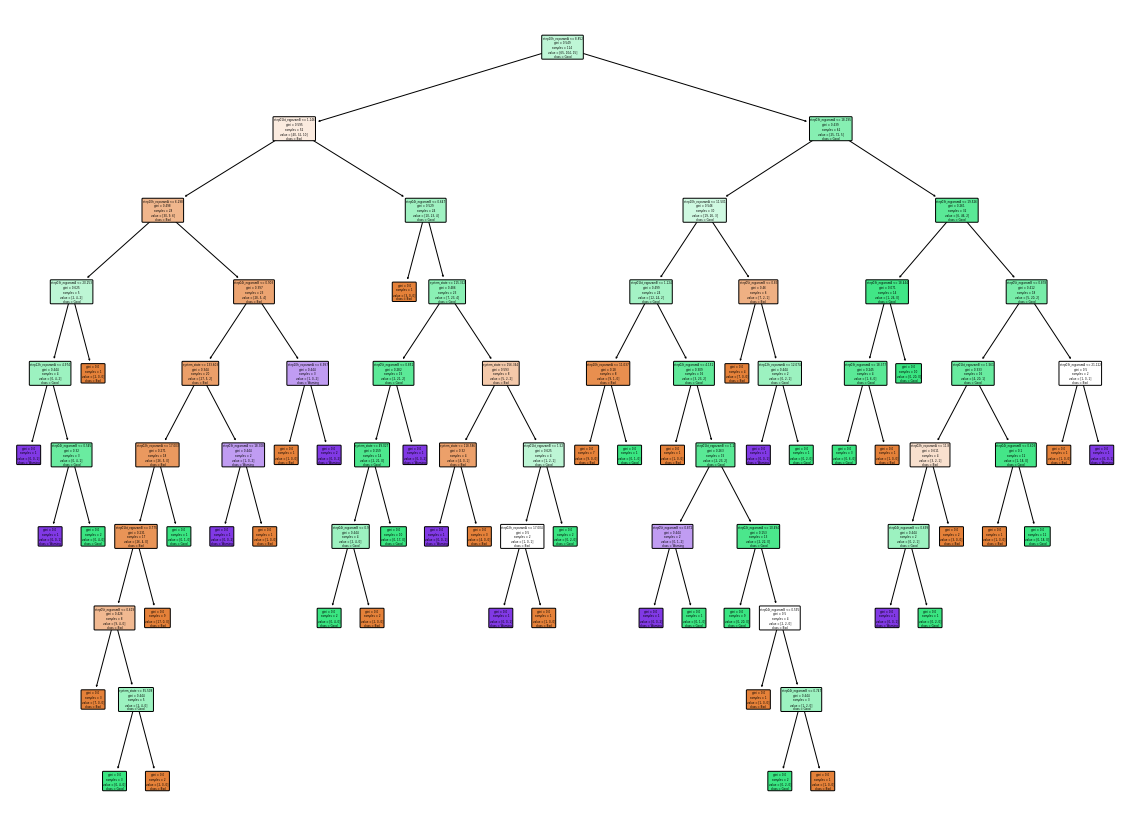

In [18]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,15))
plot_tree(rf.estimators_[3],
          feature_names=train_data.loc[:,fs.get_support()].columns,
          class_names=["Bad","Good","Warning"],
          filled=True, impurity=True,
          rounded=True)